In [1]:
# Importation of neccessary libraries

# For Analysis
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

##### DATA INSPECTION

In [2]:
# Getting files to work with
# Getting the first/last 5 rows 

data = pd.read_csv('/Users/adeshola/Downloads/Data Scientist Salaries - EDA 5/ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# last 5 rows
data.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


## Knowing what our dataset entails

. work_year - The year the salary was paid.

. experience_level - The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

. employment_type - The type of employment for the role: PT Part-time FT Full-time CT Contract FL Freelance

. job_title - The role worked in during the year

. salary - The total gross salary amount paid.

. salary_currency - The currency of the salary paid as an ISO 4217 currency code.

. salaryinusd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

. employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code.

. remote_ratio - The overall amount of work done remotely; possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

. company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code.

. company_size - The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)


In [5]:
# Dimension of the dataset
data.shape

(607, 12)

 ##### The dataset has 607 rows and 12 columns

In [7]:
#inspecting the dataset for missing values
data.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
# Statistical description
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


## Data Cleansing

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [11]:
# Removing redundant columns - using indexing

data.drop(data.columns[[0, 5, 6]], axis = 1, inplace = True)

data.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S


In [12]:
# Rename some columns value for easy understanding and visualization 

# For Experience_level Column - replace EN, MI, SE, EX with Entry, Mid, Senior and Expert Respectively.
data['experience_level'].replace('EN', 'Entry', inplace=True)
data['experience_level'].replace('MI', 'Mid', inplace=True)
data['experience_level'].replace('SE', 'Senior', inplace=True)
data['experience_level'].replace('EX', 'Expert', inplace=True)

# For Employment_type Column - replace CT, FL, FT, PT with Contract, Freelance, Full_Time and Part_Time Respectively.
data['employment_type'].replace('CT', 'Contract', inplace=True)
data['employment_type'].replace('FL', 'Freelance', inplace=True)
data['employment_type'].replace('FT', 'Full_Time', inplace=True)
data['employment_type'].replace('PT', 'Part_Time', inplace=True)

# For Remote_ratio Column - replace 0, 50, 100 with No(<20%), Partial(50%)  and Full(>80%) Respectively.
data['remote_ratio'].replace(0, 'No(<20%)', inplace=True)
data['remote_ratio'].replace(50, 'Partial(50%)', inplace=True)
data['remote_ratio'].replace(100, 'Full(>80%)', inplace=True)

# For Company_size Column - repalce S, M, L with Small(<50), Medium(<250), and Large(>250) Respectively.
data['company_size'].replace('S', 'Small(<50)', inplace=True)
data['company_size'].replace('M', 'Medium(<250)', inplace=True)
data['company_size'].replace('L', 'Large(>250)', inplace=True)

#view renamed values
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,Full_Time,Data Scientist,79833,DE,No(<20%),DE,Large(>250)
1,2020,Senior,Full_Time,Machine Learning Scientist,260000,JP,No(<20%),JP,Small(<50)
2,2020,Senior,Full_Time,Big Data Engineer,109024,GB,Partial(50%),GB,Medium(<250)
3,2020,Mid,Full_Time,Product Data Analyst,20000,HN,No(<20%),HN,Small(<50)
4,2020,Senior,Full_Time,Machine Learning Engineer,150000,US,Partial(50%),US,Large(>250)


### Exploratory Data Analysis
The data set will be visualized to give a better understanding

### Univariate

In [13]:
# Job Title Count

data['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

Text(0, 0.5, 'Count')

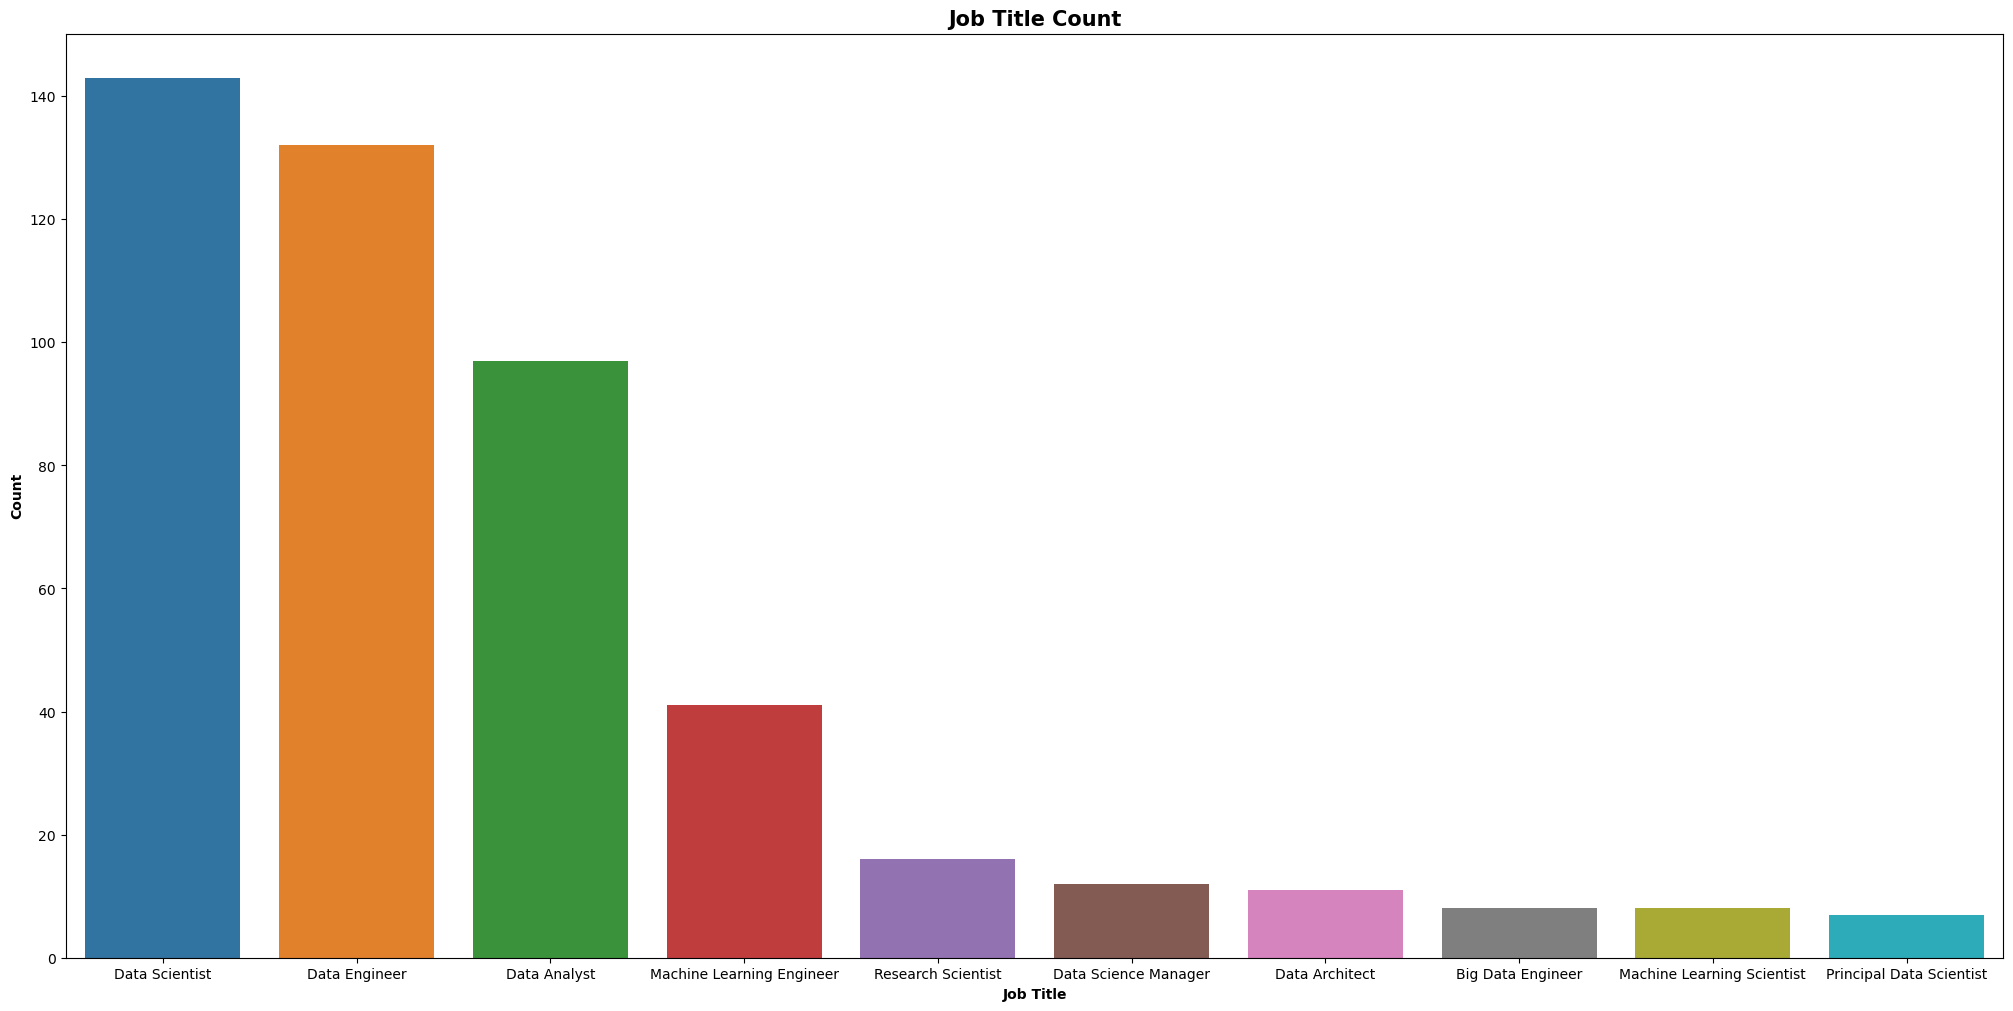

In [17]:
# Job Title Count Visualization - Top 10

data_jt = data['job_title'].value_counts()[:10]

plt.figure(figsize= (25,12))
sns.barplot(x = data_jt.index, y = data_jt)
plt.title("Job Title Count", fontsize=15,weight=("bold"))
plt.xlabel("Job Title", fontsize=10,weight=("bold"))
plt.ylabel("Count", fontsize=10,weight=("bold"))

Data Scientist are the most employed, followed by Data Engineer, then Data Analyst

In [18]:
# Company Location Count

data['company_location'].value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

Text(0, 0.5, 'Count')

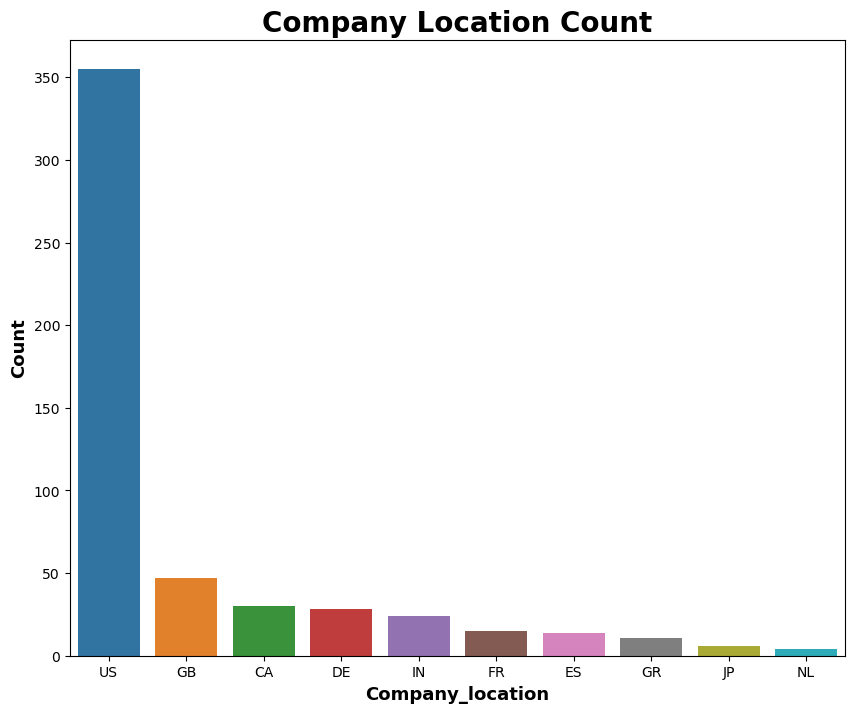

In [20]:
# Company Location Count Visualization - Top 10
data_cl = data['company_location'].value_counts()[:10]

plt.figure(figsize= (10,8))
sns.barplot(x = data_cl.index, y = data_cl)
plt.title("Company Location Count", fontsize=20,weight=("bold"))
plt.xlabel("Company_location", fontsize=13,weight=("bold"))
plt.ylabel("Count", fontsize=13,weight=("bold"))


## US has the highest demand

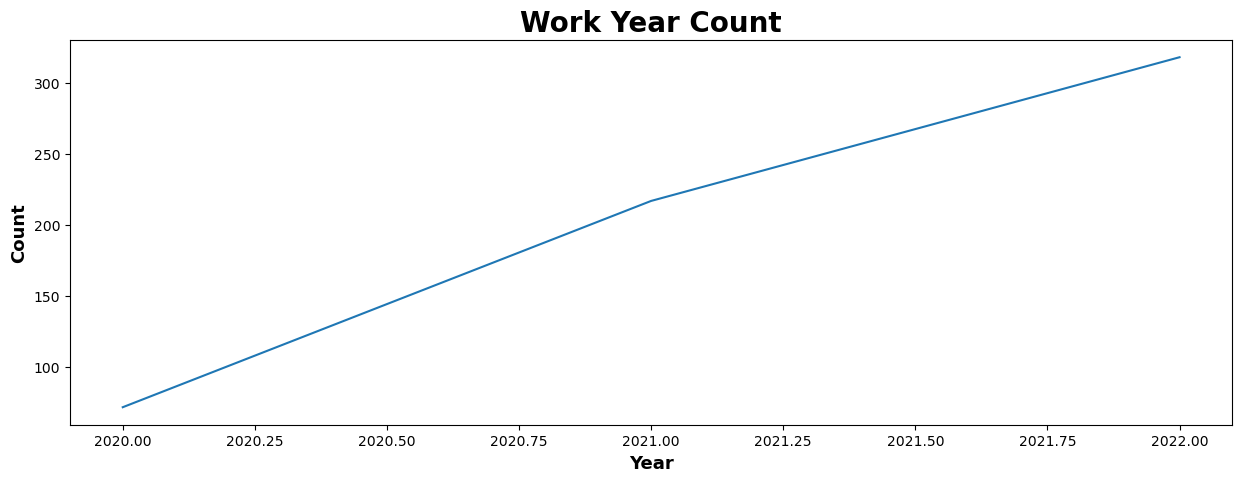

In [21]:
# Work Year Count

data_wy = data['work_year'].value_counts()
data_wy


#Visualization

plt.figure(figsize=(15,5))
plt.ticklabel_format(style='plain')
plt.plot(data_wy.index, data_wy)
plt.title("Work Year Count", fontsize=20,weight=("bold"))
plt.xlabel("Year", fontsize=13,weight=("bold"))
plt.ylabel("Count", fontsize=13,weight=("bold"))
plt.show()

There is a constant increase in the trend as the year goes by



<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

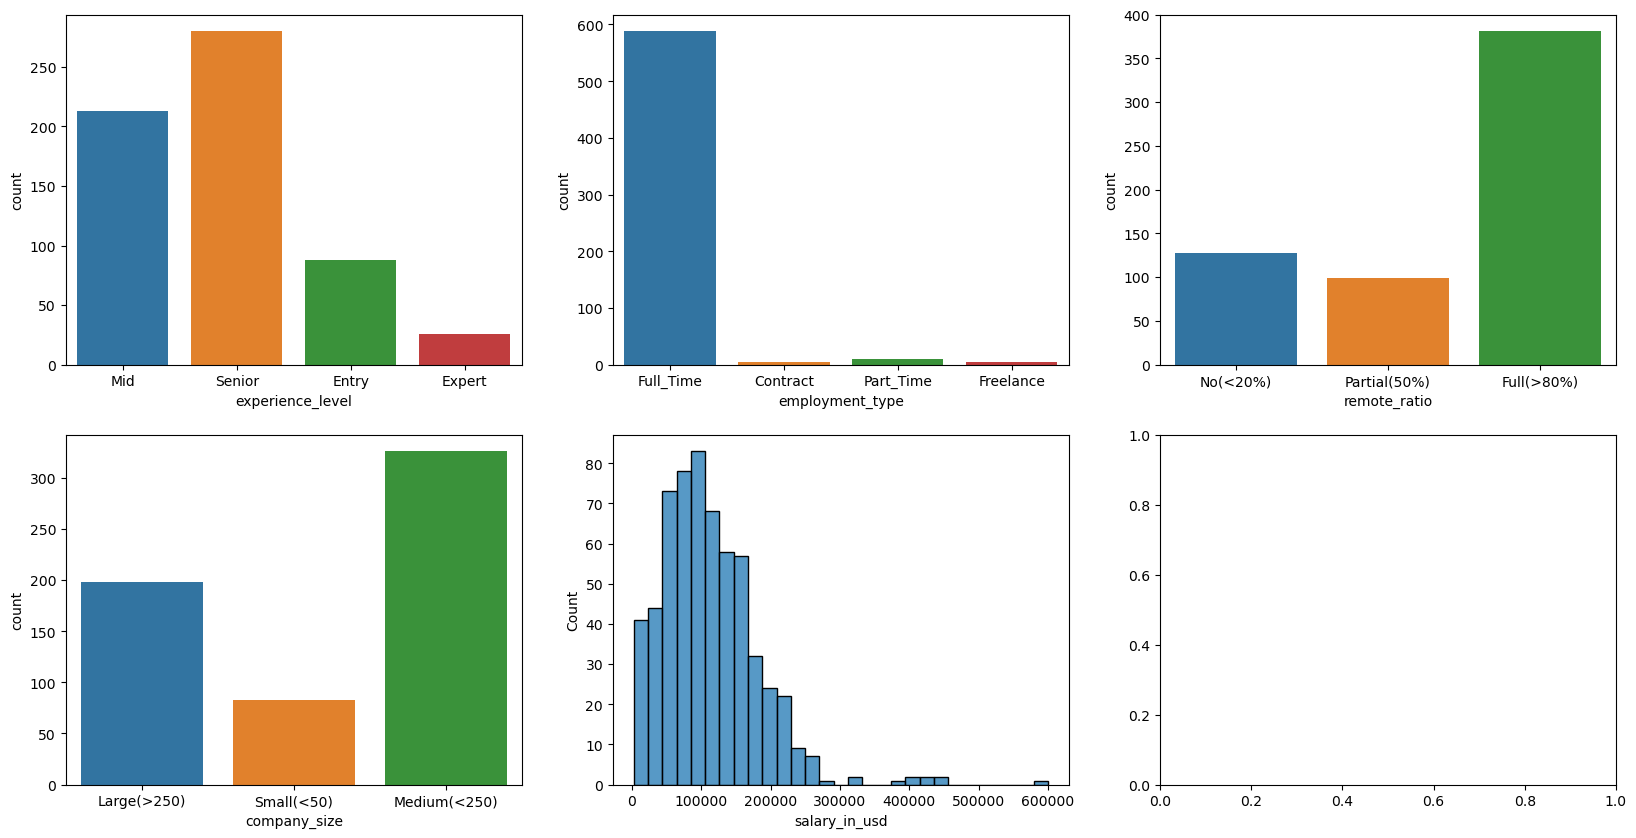

In [22]:
#### For the other Univariate Analysis, subplot will be created

#Categorical data - Bar Chart

fig, axes = plt.subplots(2,3, figsize = (20,10))
sns.countplot(x = "experience_level", data = data, ax = axes[0,0])
sns.countplot(x = "employment_type", data = data, ax = axes[0,1])
sns.countplot(x = "remote_ratio", data = data, ax = axes[0,2])
sns.countplot(x = "company_size", data = data, ax = axes[1,0])

#Numerical data - Histogram

sns.histplot(x = "salary_in_usd", data = data, ax = axes[1,1])

#### Bivariate
Work Year Analysis

<AxesSubplot:title={'center':'Remote Ratio by Work Year'}, xlabel='work_year', ylabel='count'>

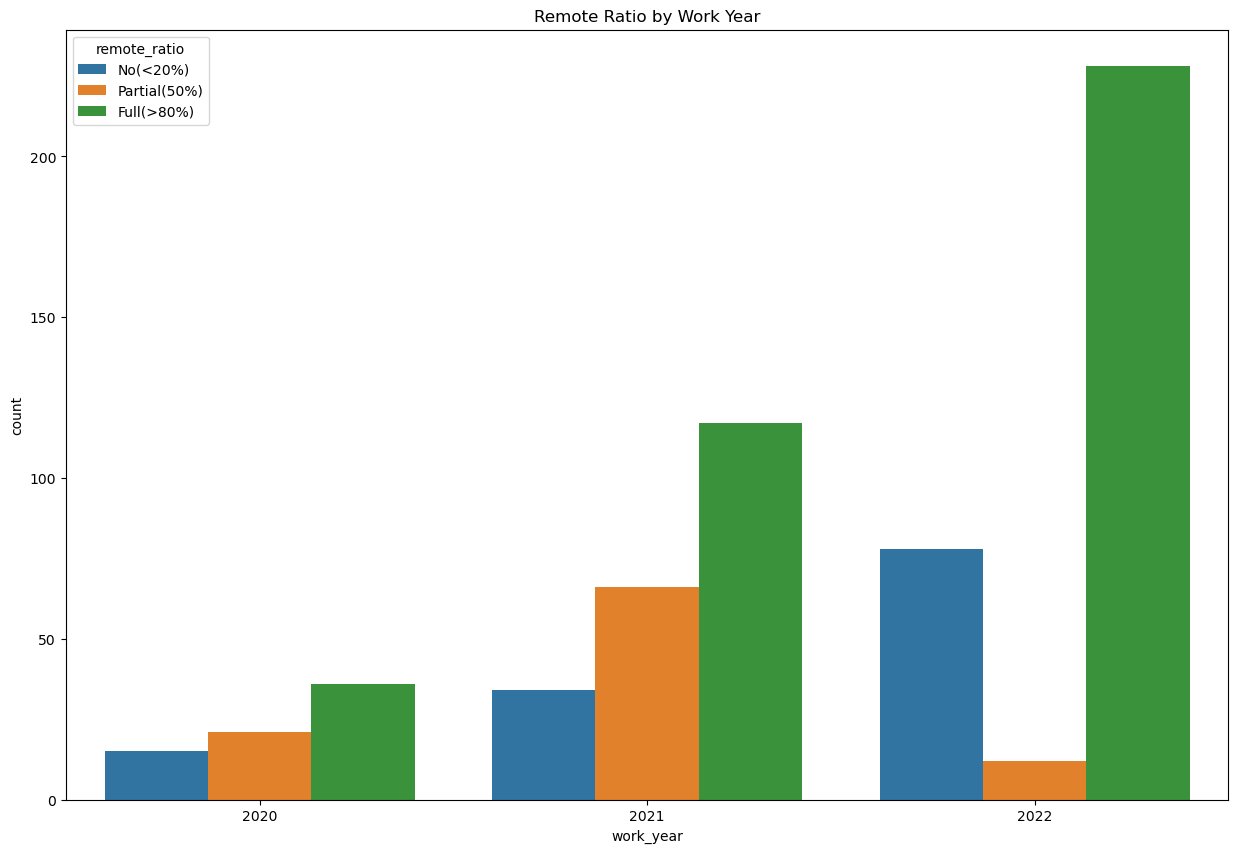

In [23]:
# Remote Ratio by Work Year

plt.figure(figsize = (15,10))
plt.title('Remote Ratio by Work Year')
sns.countplot(hue = "remote_ratio", data = data, x = "work_year")

Over the course of three years, workers who were fully remote consistently outnumbered those who were partially remote, with the exception of the year 2022 when the number of workers who were not remote surpassed the number of those who were partially remote.

## EXPERIENCE LEVEL ANALYSIS

<AxesSubplot:title={'center':'Employment Type by Experience Level'}, xlabel='count', ylabel='employment_type'>

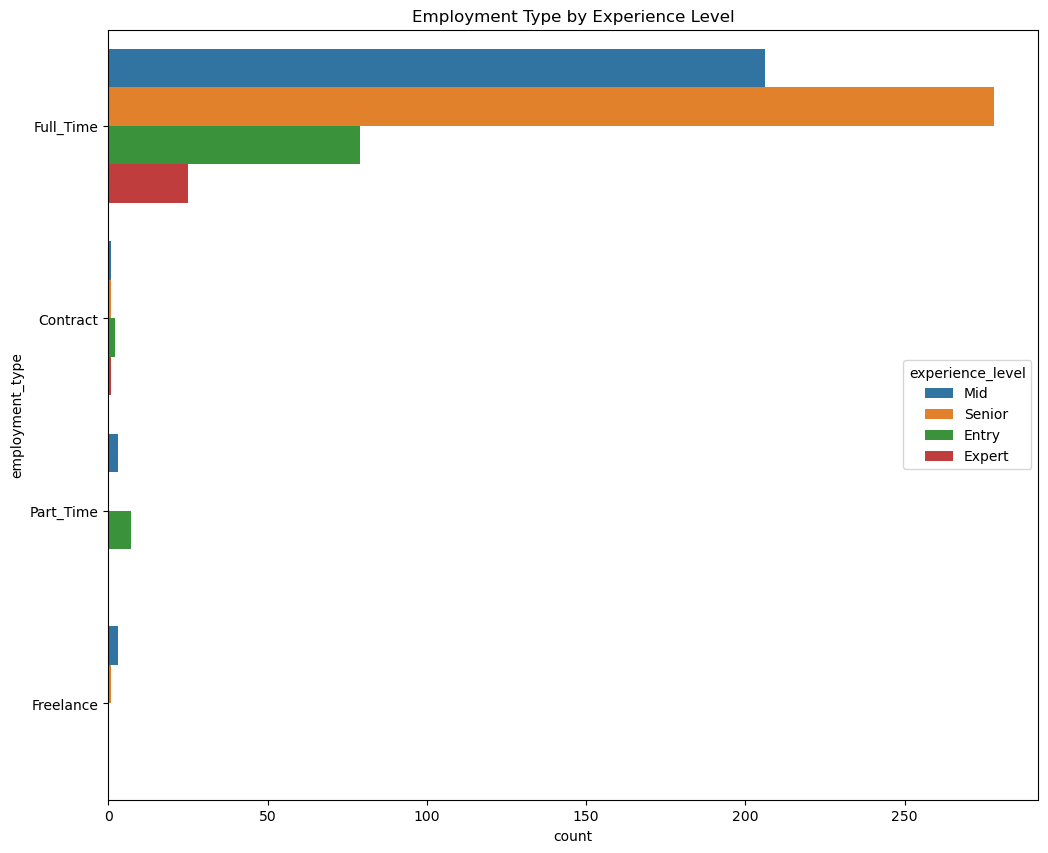

In [24]:
# Employment Type by Experience Level

plt.figure(figsize = (12,10))
plt.title('Employment Type by Experience Level')
sns.countplot(hue = "experience_level", data = data, y = "employment_type")

The majority of full-time workers were at a senior level of experience, while most contract and part-time workers were at an entry-level of experience. Freelance workers, on the other hand, were primarily at a mid-level of experience.

<AxesSubplot:title={'center':'Top 3 Job Title by Experience Level'}, xlabel='count', ylabel='job_title'>

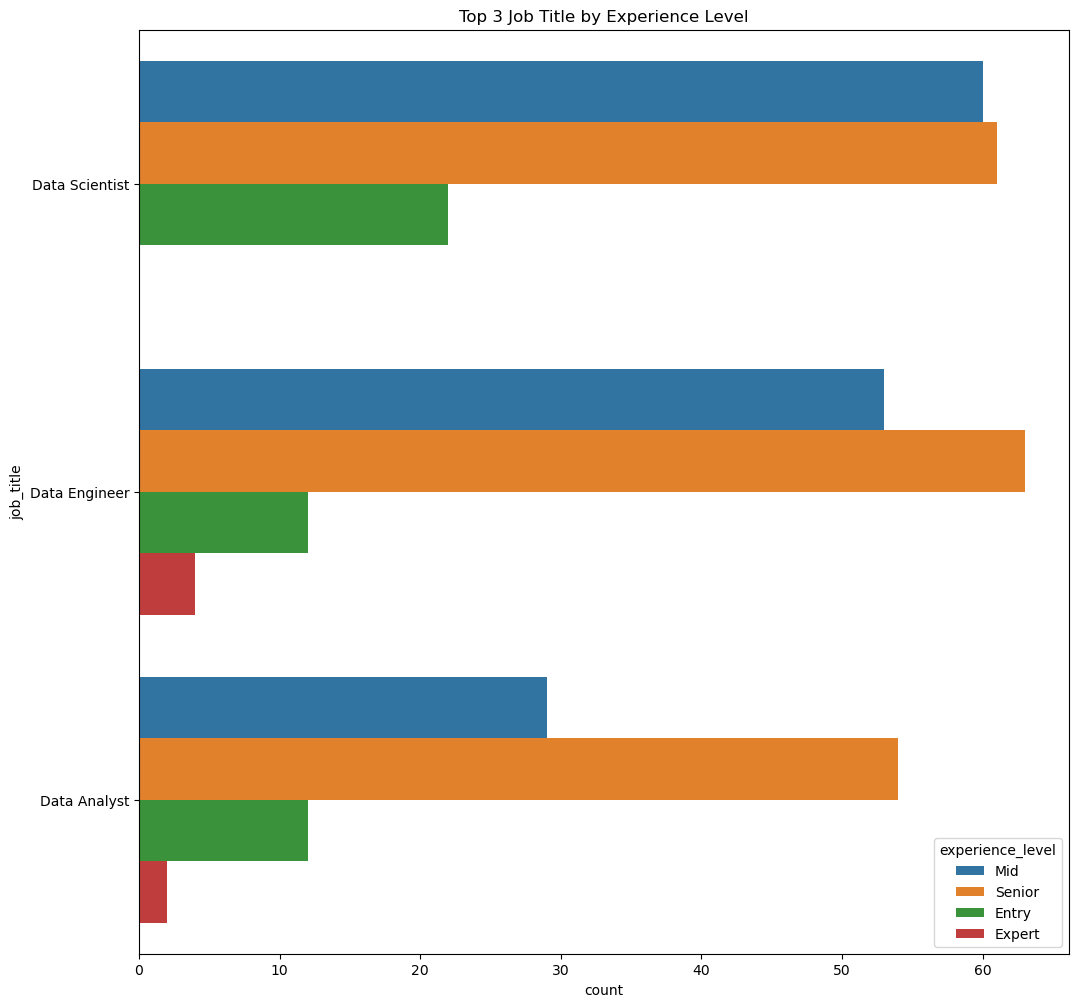

In [25]:
# Top 3 Job Title by Experience Level

orders=data['job_title'].value_counts().index[:3]
plt.figure(figsize = (12,12))
plt.title('Top 3 Job Title by Experience Level')
sns.countplot(hue = "experience_level", data = data, y = "job_title", order=orders)

Among the top three job titles, workers with a senior level of experience were the most prevalent, while those with a mid-level of experience came in second.

<AxesSubplot:title={'center':'Company Size by Experience Level'}, xlabel='company_size', ylabel='count'>

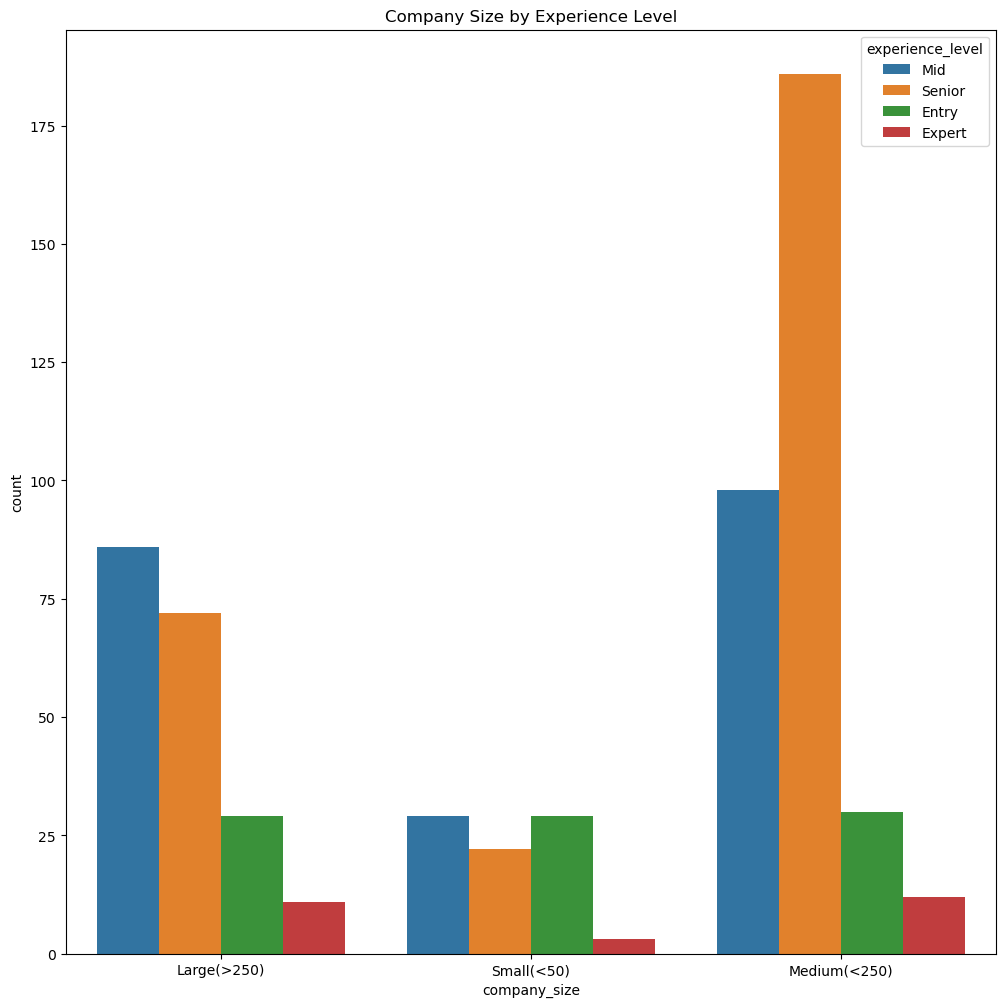

In [26]:
# Company Size by Experience Level

plt.figure(figsize = (12,12))
plt.title('Company Size by Experience Level')
sns.countplot(hue = "experience_level", data = data, x = "company_size")

###### In terms of employee experience levels, large companies with a workforce exceeding 250 staff and small companies with a workforce of less than 50 staff tend to have a higher proportion of mid-experience level staff. On the other hand, medium-sized companies with a workforce ranging from 51-249 staff tend to have a higher proportion of senior experience level staff.

### SALARY ANALYSIS

<AxesSubplot:title={'center':'Salary by Work Year'}, xlabel='work_year', ylabel='salary_in_usd'>

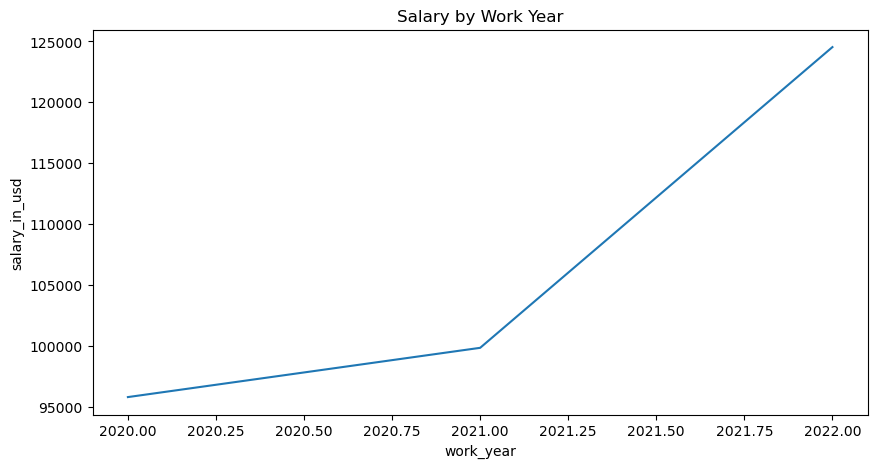

In [27]:
# Salary by work year

plt.figure(figsize = (10,5))
plt.title('Salary by Work Year')
sns.lineplot(y = "salary_in_usd", data = data, x = "work_year",  ci = None)


 ###### The salary rate showed a trend of growth over the years, with a significant increase of over 20% from the previous year(s) observed in 2022.

<AxesSubplot:title={'center':'Salary by Experience Level'}, xlabel='experience_level', ylabel='salary_in_usd'>

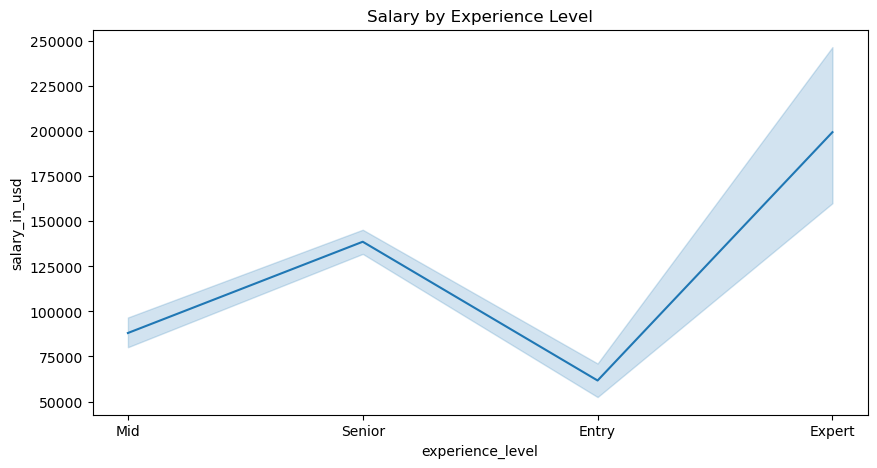

In [28]:
# Salary by Experience Level

plt.figure(figsize = (10,5))
plt.title('Salary by Experience Level')
sns.lineplot(y = "salary_in_usd", data = data, x = "experience_level")

###### There is a positive correlation between experience level and salary rate, such that individuals with greater expertise earn the highest salaries while those at the entry level earn the lowest.

<AxesSubplot:title={'center':'Salary by Company Size'}, xlabel='company_size', ylabel='salary_in_usd'>

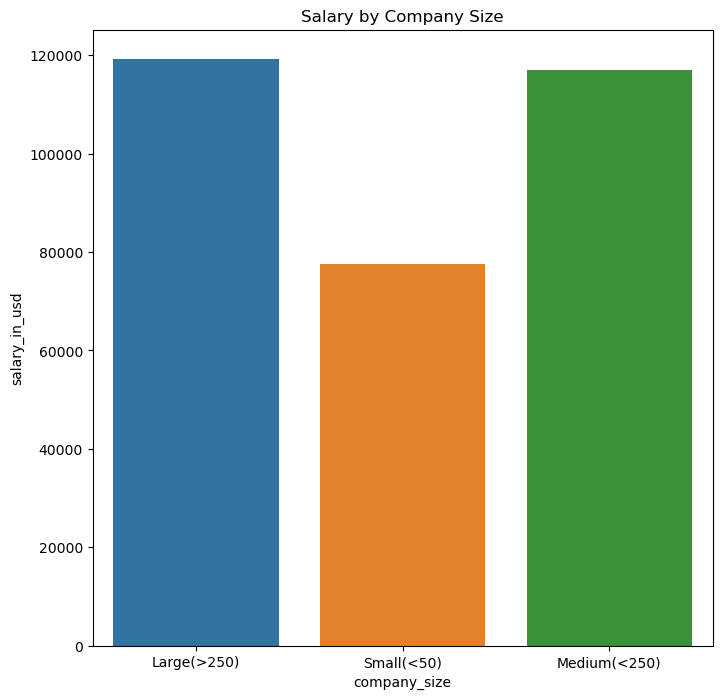

In [30]:
# Salary by Company Size

plt.figure(figsize = (8,8))
plt.title('Salary by Company Size')
sns.barplot(y = "salary_in_usd", data = data, x = "company_size", ci = None)

#### As the size of a company increases, so does the corresponding earning or salary.





In [34]:
# Highest salaries by job title - Top 5

J_T_S = data.groupby('job_title').salary_in_usd.sum().sort_values(ascending = False)[:5]
J_T_S

job_title
Data Scientist               15470860
Data Engineer                14879700
Data Analyst                  9010627
Machine Learning Engineer     4300086
Data Architect                1956613
Name: salary_in_usd, dtype: int64

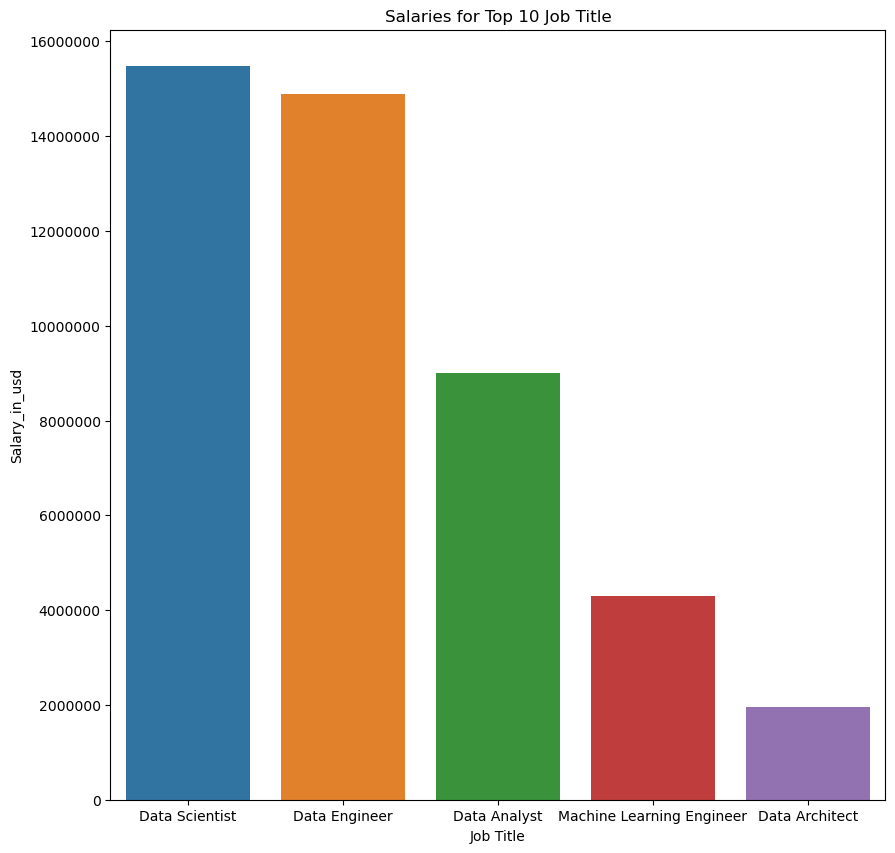

In [35]:
# Plotting for Highest salaries by job title

plt.figure(figsize = (10,10))
plt.ticklabel_format(style='plain')
plt.title('Salaries for Top 10 Job Title')
sns.barplot(y = J_T_S, x = J_T_S.index)

# Labelling the axis
plt.xlabel('Job Title')
plt.ylabel('Salary_in_usd')

plt.show()

### Data Scientist earn the highest salary, followed by Data Engineer

In [36]:
# Average Salary by Company Location

Savg = data.groupby('company_location').salary_in_usd.mean().astype(int).sort_values(ascending = False)[:10]


Ssum = data.groupby('company_location').salary_in_usd.sum().astype(int).sort_values(ascending = False)[:10]

print (Savg, Ssum)

company_location
RU    157500
US    144055
NZ    125000
IL    119059
JP    114127
AU    108042
AE    100000
DZ    100000
IQ    100000
CA     99823
Name: salary_in_usd, dtype: int64 company_location
US    51139618
GB     3834403
CA     2994712
DE     2292842
FR      959560
ES      742842
IN      685962
JP      684764
GR      575224
AU      324128
Name: salary_in_usd, dtype: int64


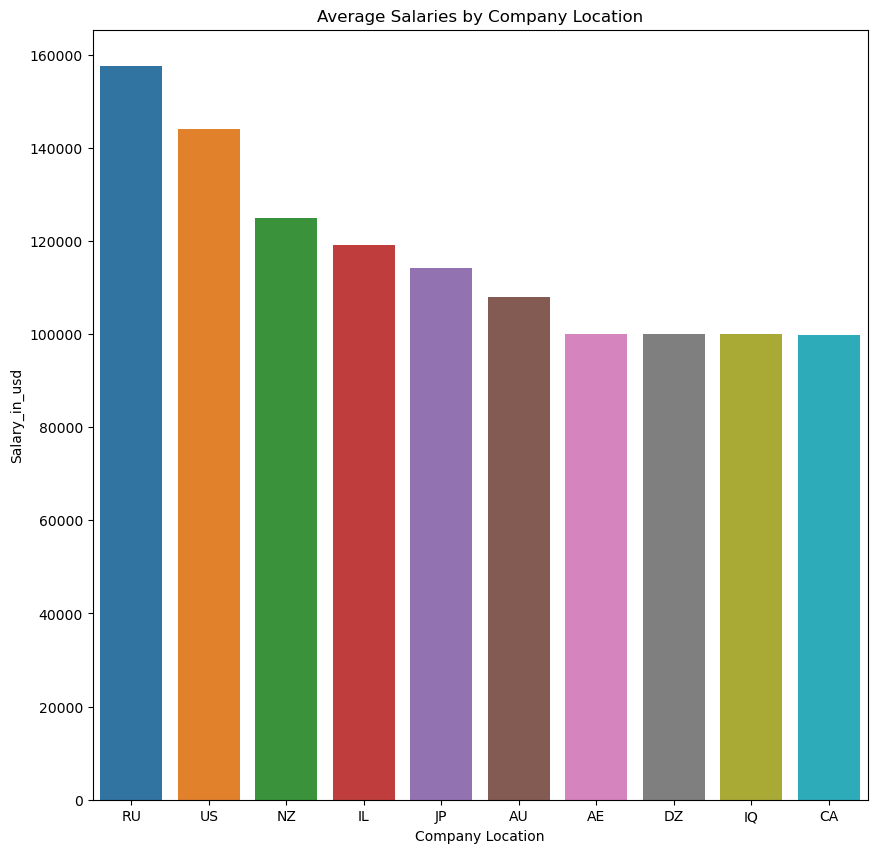

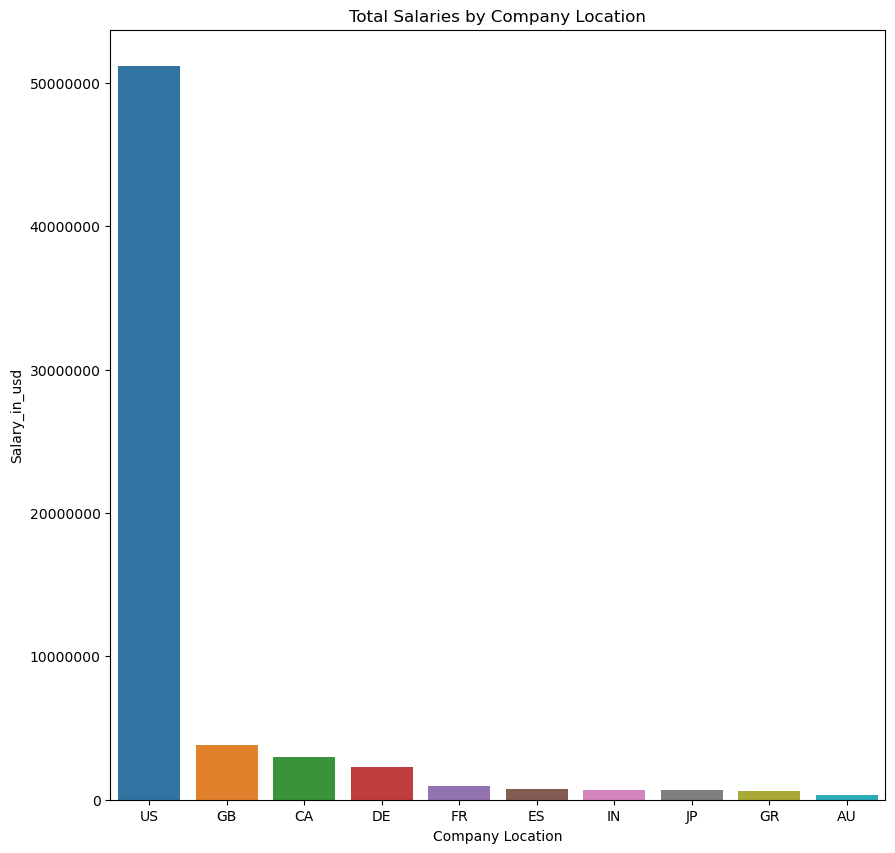

In [37]:
# Plotting for Average salaries by company location

plt.figure(figsize = (10,10))
plt.ticklabel_format(style='plain')
plt.title('Average Salaries by Company Location')
sns.barplot(y = Savg, x = Savg.index)

# Labelling the axis
plt.xlabel('Company Location')
plt.ylabel('Salary_in_usd')

plt.show()


# Plotting for Sum salaries by company location

plt.figure(figsize = (10,10))
plt.ticklabel_format(style='plain')
plt.title('Total Salaries by Company Location')
sns.barplot(y = Ssum, x = Ssum.index)

# Labelling the axis
plt.xlabel('Company Location')
plt.ylabel('Salary_in_usd')

plt.show()

#### The average salary earned in Company Location RU (Russia) is the highest among all locations, with US following closely behind. However, when considering the total salary earned, US has the highest amount followed by GB. It is important to note that the denominator used to calculate the average can greatly affect the result. Therefore, the higher the denominator, the lower the average value, which explains why Company Location RU has the highest average salary earned while US has the highest total salary earned.

<AxesSubplot:title={'center':'Salary by Remote Ratio'}, xlabel='remote_ratio', ylabel='salary_in_usd'>

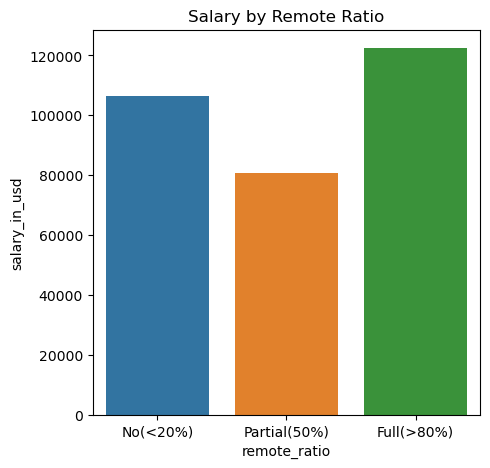

In [39]:
# Salary by Remote Ratio

plt.figure(figsize = (5,5))
plt.title('Salary by Remote Ratio')
sns.barplot(x = "remote_ratio", data = data, y = "salary_in_usd", ci = None)

Fully Remote workers earns most.



<AxesSubplot:title={'center':'Salary by Employment Type'}, xlabel='employment_type', ylabel='salary_in_usd'>

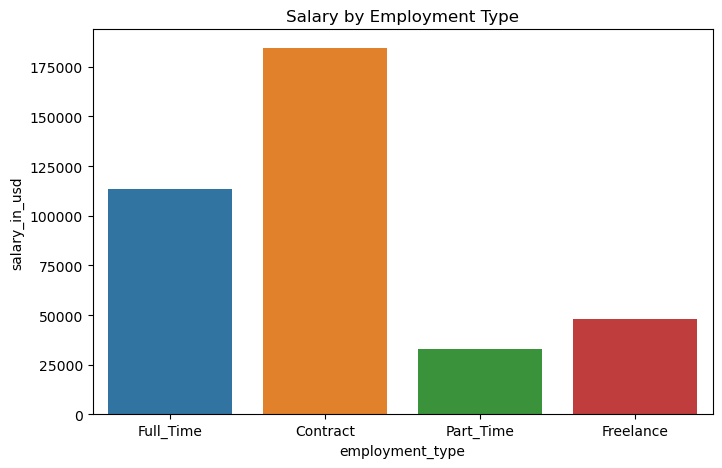

In [40]:
# Salary by Employment Type

plt.figure(figsize = (8,5))
plt.title('Salary by Employment Type')
sns.barplot(y = "salary_in_usd", data = data, x = "employment_type", ci = None)

Contract workers earned most, followed by Full time workers,then Freelancers, Part Time workers earned least.



### Multivariate

<AxesSubplot:title={'center':'Salary by Year per Top 5 Job Title'}, xlabel='job_title', ylabel='salary_in_usd'>

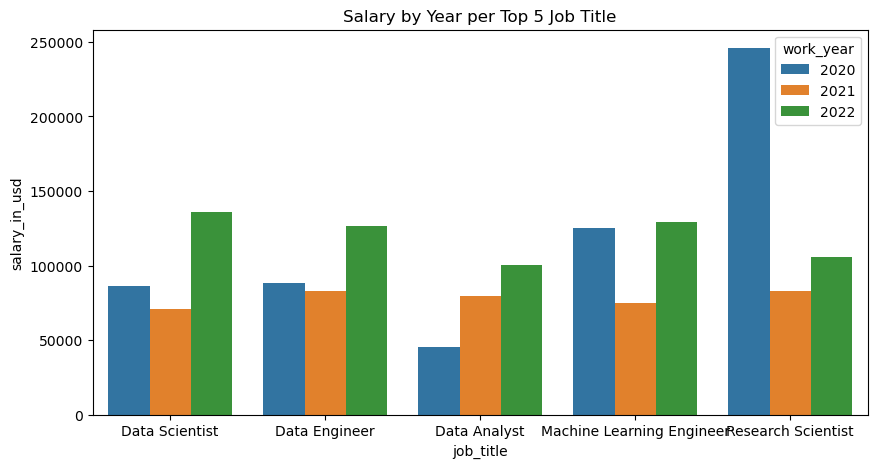

In [41]:
# Salary by Year per Top 5 Job Title

orders=data['job_title'].value_counts().index[:5]
plt.figure(figsize = (10,5))
plt.title('Salary by Year per Top 5 Job Title')
sns.barplot(hue = "work_year", data = data, y = "salary_in_usd", x = "job_title", order=orders, ci = None)

#### During the years 2020 and 2021, Research Scientists earned the highest salary compared to other professions, but in 2022, Data Scientists had the highest earnings, followed by ML Engineers and Data Engineers.

<AxesSubplot:title={'center':'Salary by Year per Experience Level'}, xlabel='experience_level', ylabel='salary_in_usd'>

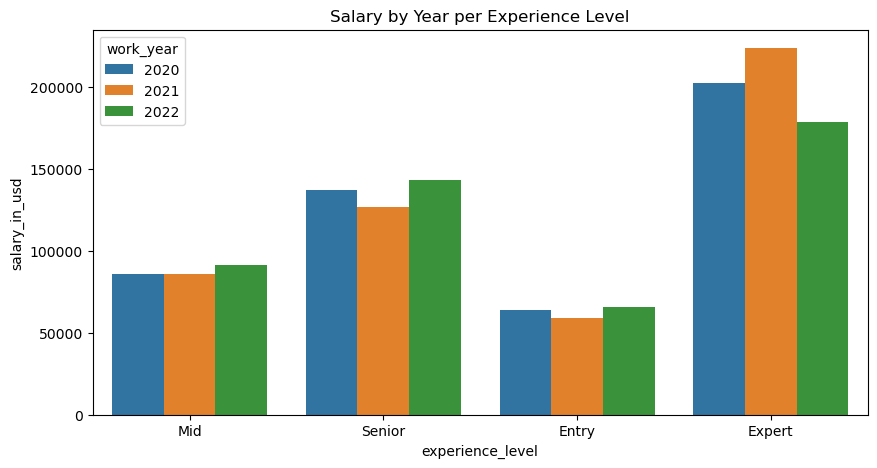

In [42]:
# Salary by Year per Experience Level

plt.figure(figsize = (10,5))
plt.title('Salary by Year per Experience Level')
sns.barplot(hue = "work_year", data = data, y = "salary_in_usd", x = "experience_level", ci = None)

#### Across all the years, Expert level of experience earned the highest salary.



<AxesSubplot:title={'center':'Salary by Remote Ratio per Year'}, xlabel='remote_ratio', ylabel='salary_in_usd'>

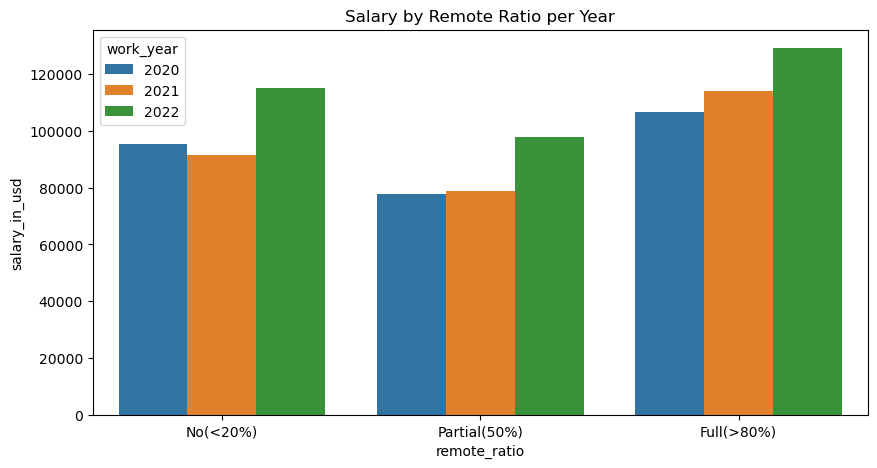

In [44]:
# Salary by Remote Ratio per year

plt.figure(figsize = (10,5))
plt.title('Salary by Remote Ratio per Year')
sns.barplot(x = "remote_ratio", data = data, y = "salary_in_usd", hue = "work_year", ci = None)

##### Over the years, the earnings of fully remote workers increased, with a steady upward trend.


Text(0.5, 1.0, 'Correlation')

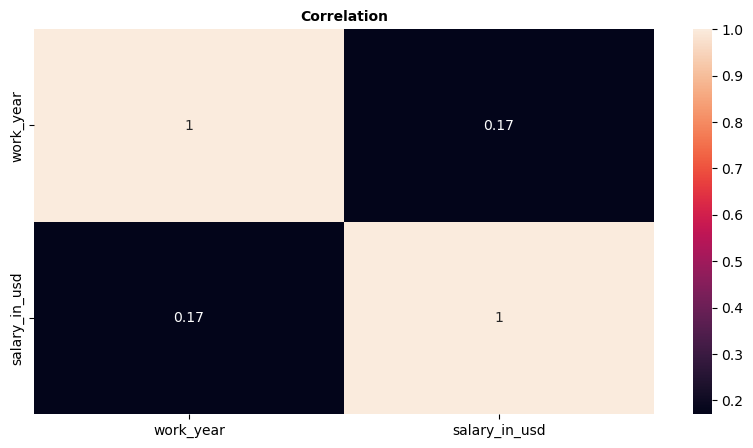

In [45]:
#view of relationships between numerical column

plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation', fontsize=10,weight=("bold"))

##### The correlation between work year and salary is weak, which may account for the observed trend of increasing salary rates over time.





## Summary, 

The observations reveal that Data Scientists are the most in-demand job title, followed by Data Engineers and Data Analysts. The US, GB, and CA are the countries with the highest demand for these tech skills. The popularity and demand for these tech skills have been increasing yearly by over 90%, with an increasing trend in salary rates across the years. Senior experienced level personnel and full-time workers dominate the workforce, while fully remote workers earn the highest salaries. Companies located in the US offer the highest salaries compared to other locations.

## Conclusion

Based on these findings, it is recommended that individuals seeking employment in the tech industry consider pursuing a career as a Data Scientist, as this job title has the highest pay and demand. Additionally, individuals should take into account the salary rates based on experience level, employment type, and company location when making decisions about their career.